In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv", index_col="PassengerId")

In [3]:
print(train.shape)

(891, 11)


In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


https://matplotlib.org/

https://seaborn.pydata.org/

In [7]:
%matplotlib inline


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

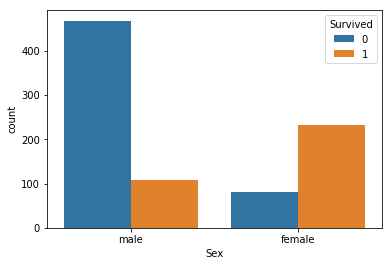

In [9]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [10]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


pclass, Emarked 2개 분석해보기

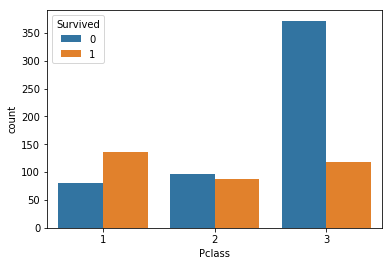

In [11]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [12]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


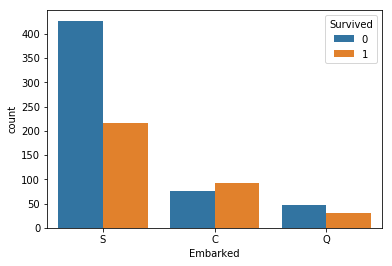

In [13]:
sns.countplot(data=train, x="Embarked", hue="Survived")

In [14]:
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


https://seaborn.pydata.org/generated/seaborn.lmplot.html

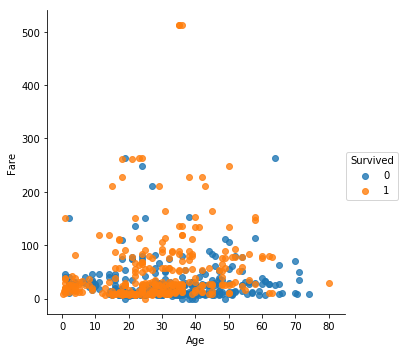

In [15]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [16]:
low_fare=train[train["Fare"]<500]
train.shape, low_fare.shape

((891, 11), (888, 11))

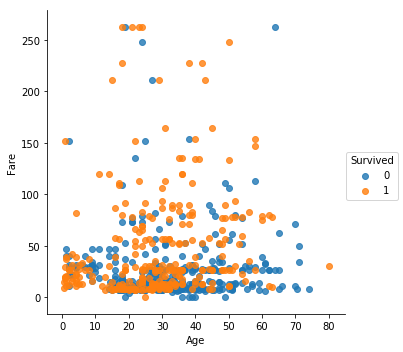

In [17]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [18]:
low_low_fare=train[train["Fare"]<100]
train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

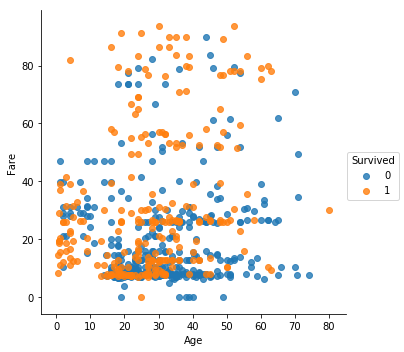

In [19]:
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

SibSp 와 Parch 가 무엇인지 먼저 확인..

In [20]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1
print(train.shape)

(891, 12)


In [21]:
train[["SibSp", "Parch", "FamilySize"]].head()

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


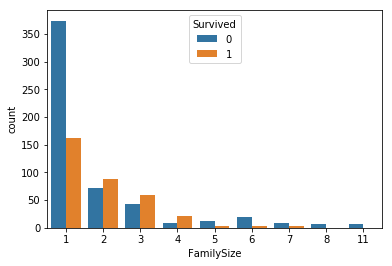

In [22]:
sns.countplot(data=train, x="FamilySize", hue="Survived")

In [23]:
train.loc[train["FamilySize"]==1,"FamilyType"]="Single"

In [24]:
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

In [25]:
train.loc[train["FamilySize"]>=5,"FamilyType"]="Big"

In [26]:
print(train.shape)

(891, 13)


In [27]:
train[["FamilySize","FamilyType"]].head(10)

,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


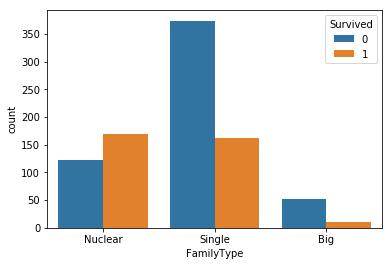

In [28]:
sns.countplot(data=train, x="FamilyType", hue="Survived")

In [29]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


In [30]:
train.loc[train["Sex"]=="male", "Sex_encode"]=0
train.loc[train["Sex"]=="female", "Sex_encode"]=1
print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 14)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [31]:
test=pd.read_csv("test.csv", index_col="PassengerId")
print(test.shape)

(418, 10)


In [32]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

print(test.shape)

test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Ticket        418 non-null object
Fare          417 non-null float64
Cabin         91 non-null object
Embarked      418 non-null object
Sex_encode    418 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 39.2+ KB


In [34]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Sex_encode
PassengerId,,,,,,,,,,,,,,


In [35]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [36]:
train["Fare_fillin"]=train["Fare"]
print(train.shape)

(891, 15)


In [37]:
train[["Fare", "Fare_fillin"]].head()

,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [38]:
test["Fare_fillin"] = test["Fare"]
print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [39]:
test.loc[test["Fare"].isnull(), "Fare_fillin"]=0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


Embarked 전처리

In [40]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

In [41]:
print(train.shape)

train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 18)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [42]:

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)

test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [43]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)

train[["SibSp", "Parch", "FamilySize"]].head()

(891, 18)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [44]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

print(test.shape)

test[["SibSp", "Parch", "FamilySize"]].head()

(418, 16)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [45]:
train["Single"] = train["FamilySize"] == 1

train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)

train["Big"] = train["FamilySize"] >= 5

print(train.shape)

train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 21)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [46]:
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5

print(test.shape)

test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 19)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Sex_encode     418 non-null float64
Fare_fillin    418 non-null float64
Embarked_C     418 non-null bool
Embarked_S     418 non-null bool
Embarked_Q     418 non-null bool
FamilySize     418 non-null int64
Single         418 non-null bool
Nuclear        418 non-null bool
Big            418 non-null bool
dtypes: bool(6), float64(4), int64(4), object(5)
memory usage: 48.2+ KB


In [48]:
feature_names = ["Sex_encode",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "Single", "Nuclear", "Big"]
feature_names

['Sex_encode',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Single',
 'Nuclear',
 'Big']

In [49]:
label_name = "Survived"
label_name

'Survived'

In [50]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(891, 7)


,Sex_encode,Embarked_C,Embarked_S,Embarked_Q,Single,Nuclear,Big
PassengerId,,,,,,,
1,0.0,False,True,False,False,True,False
2,1.0,True,False,False,False,True,False
3,1.0,False,True,False,True,False,False
4,1.0,False,True,False,False,True,False
5,0.0,False,True,False,True,False,False


In [51]:
y_train = train[label_name]

print(y_train.shape)

y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [53]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [54]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(418, 7)


,Sex_encode,Embarked_C,Embarked_S,Embarked_Q,Single,Nuclear,Big
PassengerId,,,,,,,
892,0.0,False,False,True,True,False,False
893,1.0,False,True,False,False,True,False
894,0.0,False,False,True,True,False,False
895,0.0,False,True,False,True,False,False
896,1.0,False,True,False,False,True,False


In [55]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [56]:
submission = pd.read_csv("gender_submission.csv", index_col="PassengerId")
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [ ]:
submission["Survived"] = predictions
print(submission.shape)
submission.head()

In [57]:
submission.to_csv("여기에 변환파일이름 지정.csv")